- author: Macrina Lobo

In [1]:
import scvelo as scv
scvelo.logging.print_version()

Running scvelo 0.2.2.dev51+ga7de78a (python 3.6.10) on 2021-07-01 00:29.


In [2]:
import scanpy as sc

In [3]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [4]:
import celloracle as co

In [5]:
save_folder = "/Users/LoboM/Dropbox/FINAL_CO/"

In [6]:
for goi in ['Foxn1']:
    print(goi)
    adata_test = sc.read_h5ad(save_folder + "co_foxn1_ko_sim_10k_5_prop_filtered_top_in_source_0005.h5ad")# oracle.adata after perturbation simulation
    scv.pp.neighbors(adata_test)
    adata_test.layers['velocity'] = adata_test.layers['delta_X'].copy()
    adata_test.layers['Ms'] = adata_test.layers['imputed_count'].copy()
    scv.tl.velocity_graph(adata_test)
    

Foxn1
computing neighbors
    finished (0:00:30) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph
    finished (0:37:52) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


NameError: name 'info_clusters' is not defined

In [10]:
adata_test.obs['clusters'] = adata_test.obs['seurat_clusters']
adata_test.uns['clusters_colors'] = adata_test.uns['seurat_clusters_colors'].copy()


In [11]:
scv.pl.velocity_embedding_stream(adata_test, dpi=150, figsize=(7,7),basis='umap')

computing velocity embedding
    finished (0:00:30) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


In [12]:
scv.pl.velocity_embedding_stream(adata_test, dpi=150, figsize=(7,7),basis='umap',save='_stream_ar_1_all_arrows_' + goi + '.svg')
scv.pl.velocity_embedding_stream(adata_test, dpi=150, figsize=(7,7),min_mass=3, basis='umap',save='_stream_ar_' + goi + '.svg')
scv.tl.velocity_confidence(adata_test)
adata_test.obs['ko-original_simulatedexpression_change'] = adata_test.obs['velocity_length'].copy()
scv.pl.scatter(adata_test, c='ko-original_simulatedexpression_change', figsize=(7,7), dpi = 150, cmap='coolwarm', perc=[5, 95],save='_velocity_length_ar' + goi + '.svg')
del adata_test.layers['delta_X']
del adata_test.layers['imputed_count']
del adata_test.obs['velocity_length']
adata_test.write(save_folder + goi + "_co_foxn1_ko_sim_10k_5_prop_filtered_top_in_source_0005_scvelo.h5ad")

saving figure to file ./figures/scvelo__stream_ar_1_all_arrows_Foxn1.svg
saving figure to file ./figures/scvelo__stream_ar_Foxn1.svg
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
saving figure to file ./figures/scvelo__velocity_length_arFoxn1.svg


In [13]:
scv.pl.velocity_embedding_stream(adata_test, dpi=150, figsize=(7,7),min_mass=4, basis='umap',save='_stream_ar_' + goi + '.svg')



saving figure to file ./figures/scvelo__stream_ar_Foxn1.svg


saving figure to file ./figures/scvelo__velocity_length_conf_tran.svg


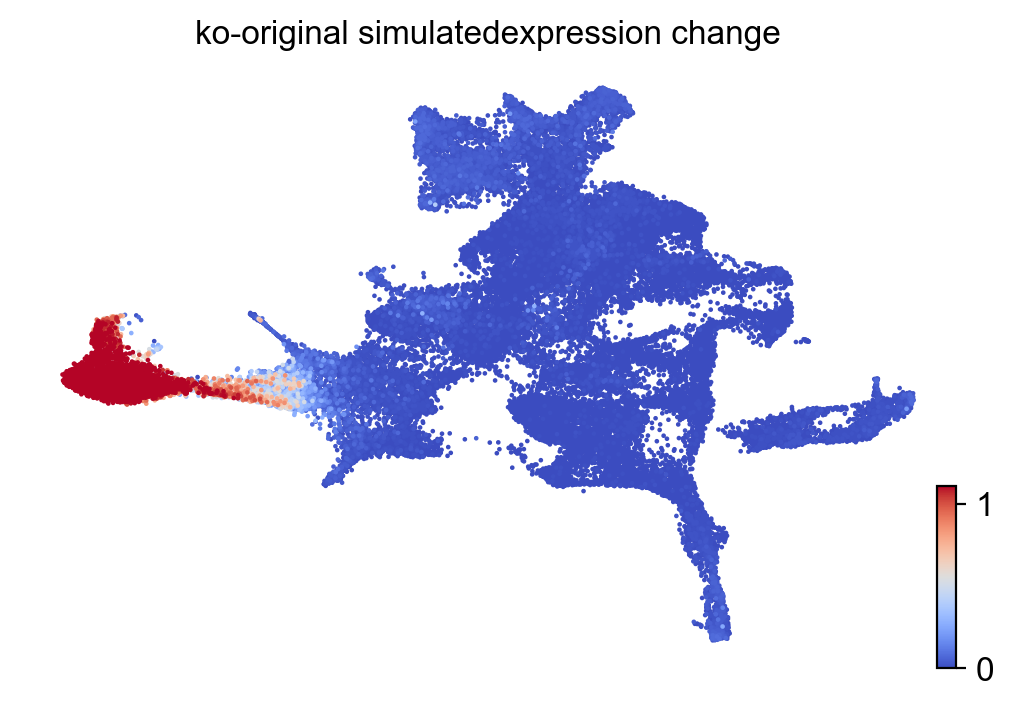

In [28]:
scv.pl.scatter(adata_test, c='ko-original_simulatedexpression_change', cmap='coolwarm', perc=[5, 95],save='_velocity_length_conf_tran.svg')